In [640]:
import pandas as pd, numpy as np, seaborn as sn, matplotlib.pyplot as plt

df = pd.read_csv("dataset/hcc_dataset.csv", na_values='?')
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,NaN,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137.0,15.0,Active,NaN,NaN,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0.0,NaN,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50.0,50.0,Ambulatory,NaN,Mild,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40.0,30.0,Active,NaN,NaN,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100.0,30.0,Active,NaN,NaN,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives


In [641]:
print(df.shape[0])

df.info()


165
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null   

Analisando os histogramas abaixo é possível notar que "Age", "INR", "Hemoglobin", "MCV", "Albumin" e "Iron" parece seguir uma distribuição normal, o que espero que possa nos ajudar a completar os valores faltantes 

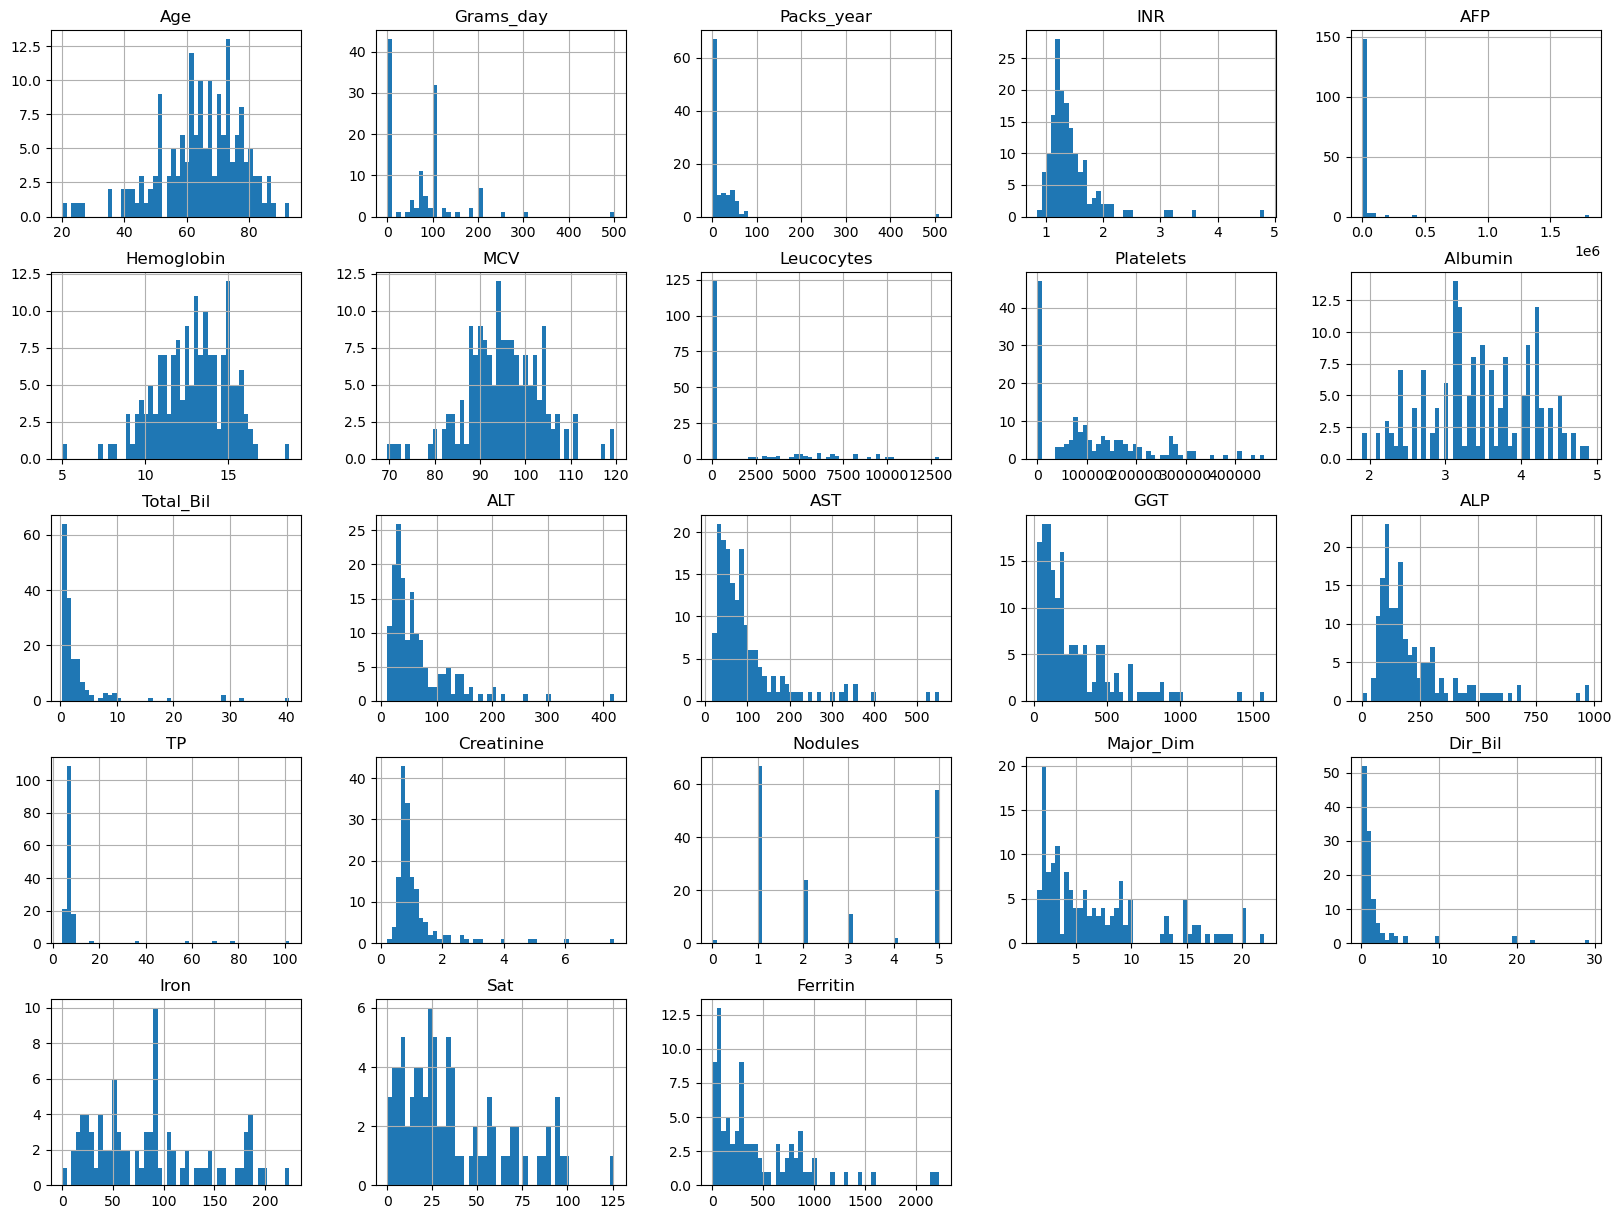

In [642]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Número de colunas com dados faltantes, se pode notar que há muitos dados faltantes em "Encephalopathy" e "Ascites", pelo que não me parecem boas features a se ter em consideração, 
li que features com mais de 80% de valores faltantes, em geral, não são boas features para avaliação, portanto se há por volta de 130 valores faltantes no nosso caso

In [643]:
df.isnull().sum()


Gender              0
Symptoms           18
Alcohol             0
HBsAg              17
HBeAg              39
HBcAb              24
HCVAb               9
Cirrhosis           0
Endemic            39
Smoking            41
Diabetes            3
Obesity            10
Hemochro           23
AHT                 3
CRI                 2
HIV                14
NASH               22
Varices            52
Spleno             15
PHT                11
PVT                 3
Metastasis          4
Hallmark            2
Age                 0
Grams_day          48
Packs_year         53
PS                  0
Encephalopathy    143
Ascites           111
INR                 4
AFP                 8
Hemoglobin          3
MCV                 3
Leucocytes          3
Platelets           3
 Albumin            6
Total_Bil           5
ALT                 4
AST                 3
GGT                 3
ALP                 3
TP                 11
Creatinine          7
Nodules             2
Major_Dim          20
Dir_Bil   

In [644]:
df = df.drop(columns=["Encephalopathy", "Ascites"])

In [645]:
df.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,165.000000,117.000000,112.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,160.000000,161.000000,162.000000,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000
mean,64.690909,71.008547,20.464286,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647
std,13.319534,76.277680,51.565130,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,5.499379,57.539747,87.484241,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454
min,20.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,0.800000,31.000000,46.250000,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000
50%,66.000000,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,50.000000,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.675000,19.525000,171500.000000,4.050000,2.925000,78.000000,110.250000,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000
max,93.000000,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,40.500000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


Vou dividir os dados pelo género do paciente.

Número de homens infetados: 133


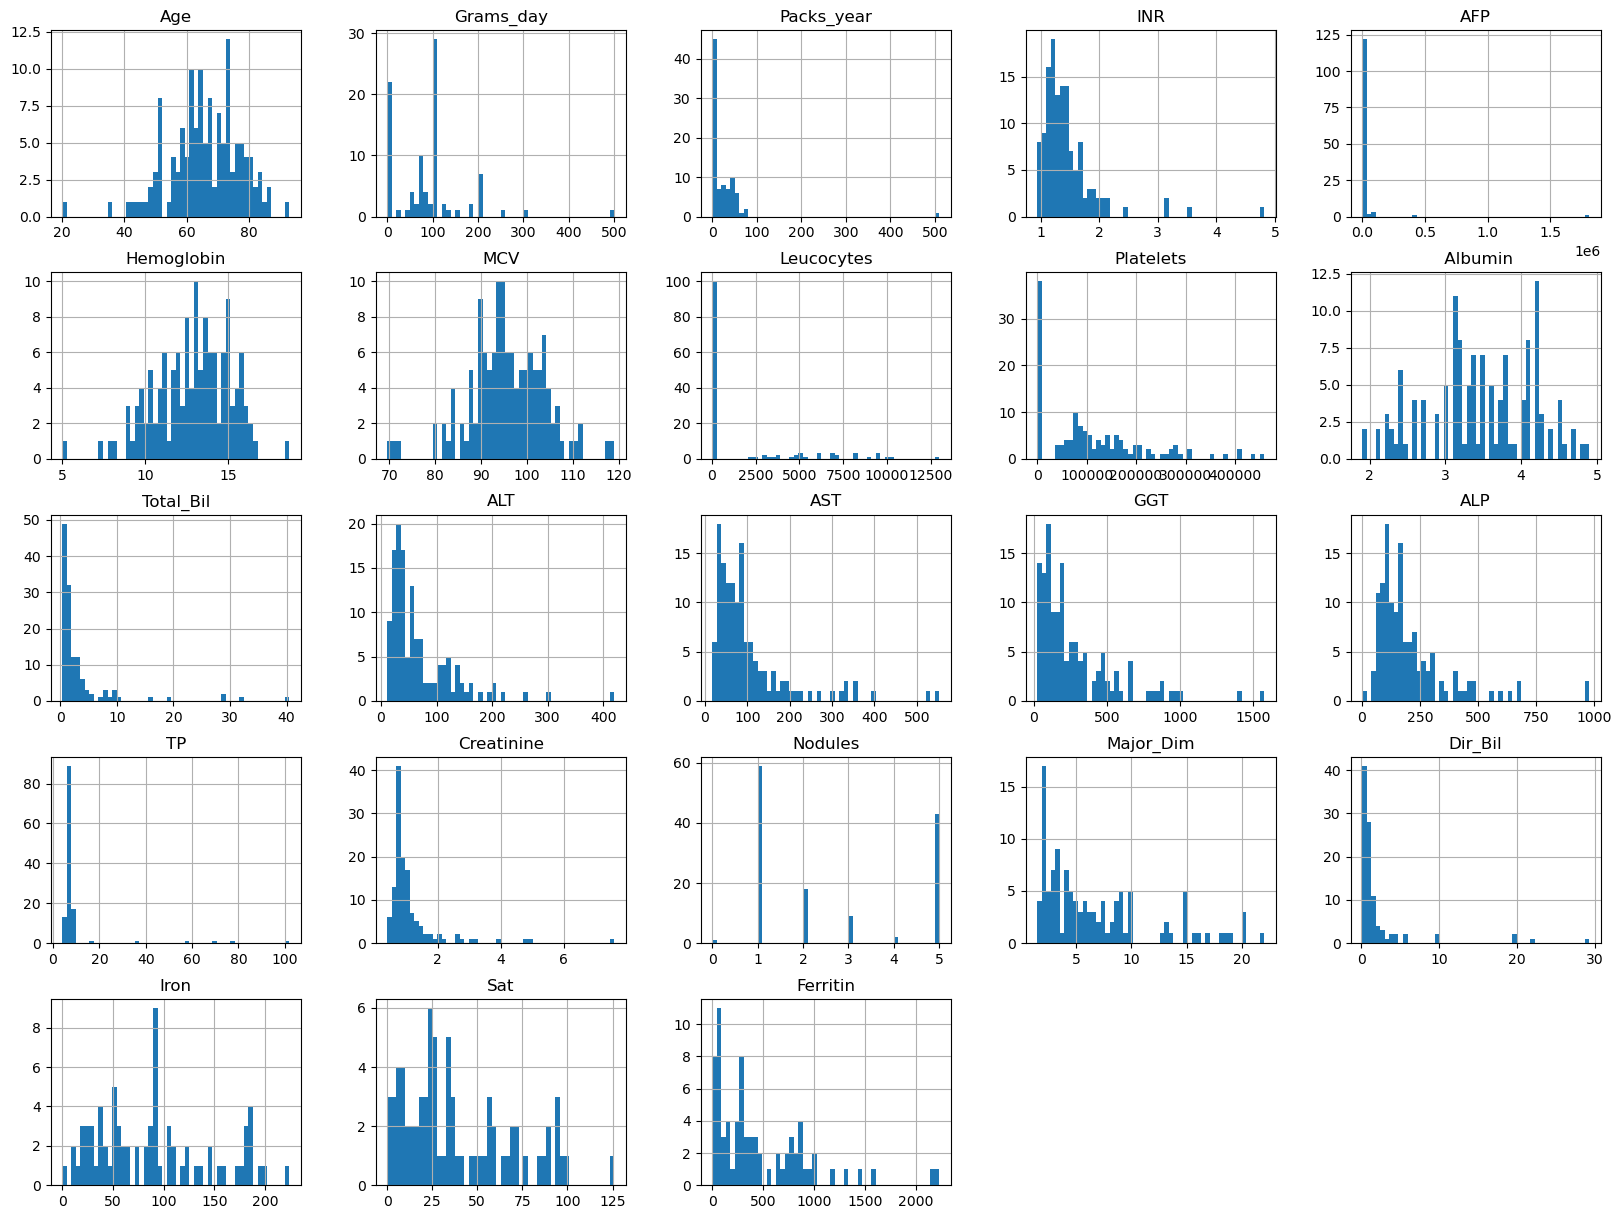

In [646]:
male = df[df['Gender'] == 'Male']
male.hist(bins=50, figsize=(20,15))
#plt.show()
num_male=male.shape[0]
print("Número de homens infetados:",num_male)

Número de mulheres infetadas: 32


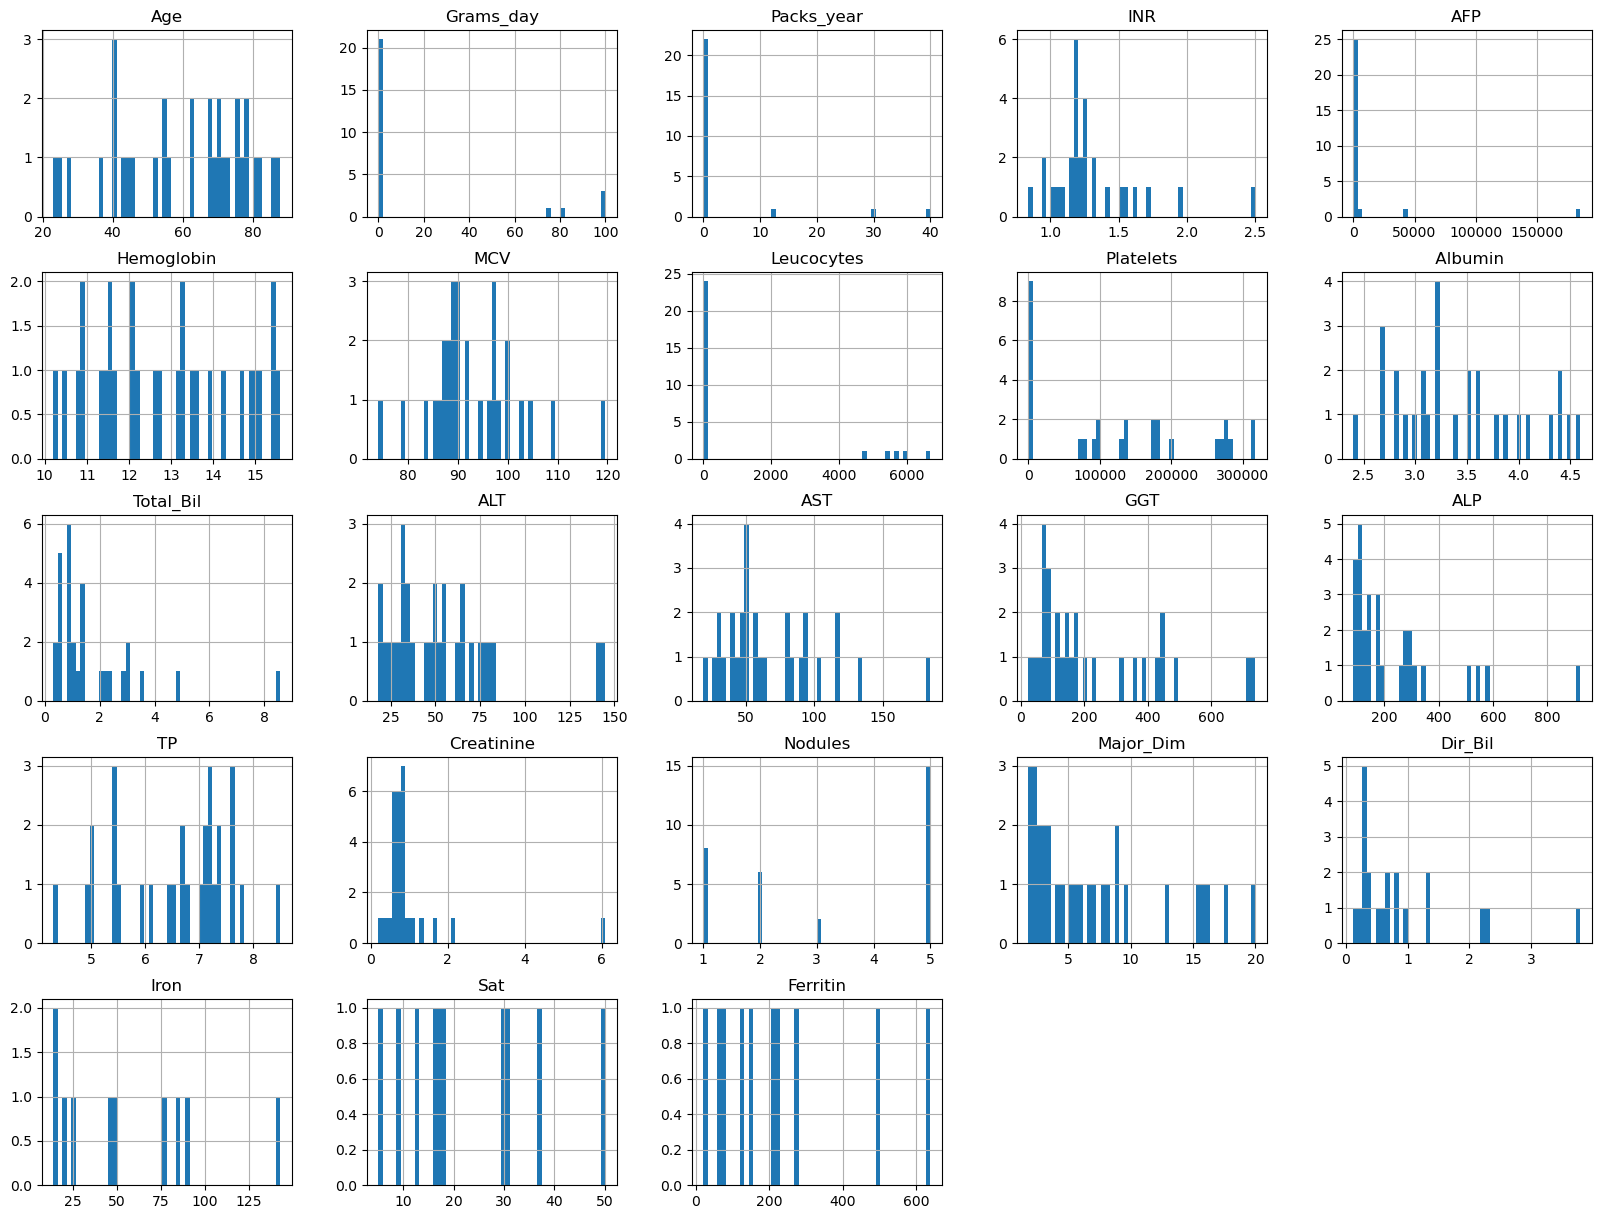

In [647]:
female = df[df['Gender'] == 'Female']
female.hist(bins=50, figsize=(20,15))
#plt.show()
num_female=female.shape[0]
print("Número de mulheres infetadas:",num_female)

Transformar Gender e Class em valores númericos.

In [648]:
df = pd.get_dummies(df, columns=['Gender'], dtype=float)
df = pd.get_dummies(df, columns=['Class'], dtype=float, drop_first=True).rename(columns={"Class_Lives": "Class"})
pd.set_option('display.max_columns', None)
df

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Gender_Female,Gender_Male,Class
0,No,Yes,No,No,No,No,Yes,No,Yes,Yes,NaN,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137.0,15.0,Active,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,0.0,1.0,1.0
1,NaN,No,No,No,No,Yes,Yes,NaN,NaN,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0.0,NaN,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1.0,0.0,1.0
2,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50.0,50.0,Ambulatory,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,0.0,1.0,1.0
3,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40.0,30.0,Active,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0.0,1.0,0.0
4,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100.0,30.0,Active,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,40,NaN,NaN,Active,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0
161,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,No,No,No,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes,68,0.0,0.0,Ambulatory,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,1.0,0.0,0.0
162,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,NaN,NaN,NaN,NaN,No,No,Yes,65,NaN,48.0,Active,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,0.0,1.0,1.0
163,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,NaN,NaN,NaN,Yes,Yes,Yes,44,NaN,NaN,Ambulatory,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0


In [649]:
df = pd.get_dummies(df, columns=df.columns[:22], drop_first=True, dtype=float)
df = pd.get_dummies(df, columns=['PS'], dtype=float)

target = 'Class'
cols = [col for col in df.columns if col != target]
cols.append(target)
df = df.reindex(columns=cols)

df


,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Gender_Female,Gender_Male,Symptoms_Yes,Alcohol_Yes,HBsAg_Yes,HBeAg_Yes,HBcAb_Yes,HCVAb_Yes,Cirrhosis_Yes,Endemic_Yes,Smoking_Yes,Diabetes_Yes,Obesity_Yes,Hemochro_Yes,AHT_Yes,CRI_Yes,HIV_Yes,NASH_Yes,Varices_Yes,Spleno_Yes,PHT_Yes,PVT_Yes,Metastasis_Yes,Hallmark_Yes,PS_Active,PS_Ambulatory,PS_Disabled,PS_Restricted,PS_Selfcare,Class
0,67,137.0,15.0,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,62,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,78,50.0,50.0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,77,40.0,30.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76,100.0,30.0,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,40,NaN,NaN,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
161,68,0.0,0.0,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
162,65,NaN,48.0,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
163,44,NaN,NaN,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Abaixo é criada a matriz de correlação, e após avaliada são eliminadas as features com menos de 1.1% de correlação absoluta, o que após algumas verificações é notado significamente a melhoria do recall que é a nossa métrica mais signficativa para o caso determinado, que é evitar falsos negativos.

In [650]:
# matriz de correlação entre as features e o target
correlation_matrix = df.corr()['Class']
print(correlation_matrix)
# Extraia a correlação entre as features e o target (última coluna da matriz de correlação)
target_correlation = correlation_matrix.iloc[:-1]
print(target_correlation)

# Filtra as colunas que têm correlação abaixo de determinado valor
columns_to_keep = target_correlation[abs(target_correlation) >= 0.03].index
print(columns_to_keep)
# Mantém apenas as colunas selecionadas no DataFrame original
df = df[columns_to_keep].join(df['Class'])
df

Age              -0.146054
Grams_day        -0.086573
Packs_year       -0.089814
INR              -0.202348
AFP               0.001972
Hemoglobin        0.292357
MCV               0.042074
Leucocytes       -0.102192
Platelets        -0.150911
 Albumin          0.287799
Total_Bil        -0.223961
ALT              -0.006058
AST              -0.190614
GGT              -0.148655
ALP              -0.293873
TP               -0.029274
Creatinine       -0.108708
Nodules          -0.088705
Major_Dim        -0.193681
Dir_Bil          -0.264903
Iron              0.291406
Sat               0.043110
Ferritin         -0.321489
Gender_Female     0.038435
Gender_Male      -0.038435
Symptoms_Yes     -0.355484
Alcohol_Yes      -0.040302
HBsAg_Yes         0.046755
HBeAg_Yes        -0.099359
HBcAb_Yes         0.074342
HCVAb_Yes        -0.093086
Cirrhosis_Yes     0.037557
Endemic_Yes       0.095057
Smoking_Yes       0.078431
Diabetes_Yes     -0.121668
Obesity_Yes       0.024323
Hemochro_Yes     -0.020256
A

,Age,Grams_day,Packs_year,INR,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,AST,GGT,ALP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Gender_Female,Gender_Male,Symptoms_Yes,Alcohol_Yes,HBsAg_Yes,HBeAg_Yes,HBcAb_Yes,HCVAb_Yes,Cirrhosis_Yes,Endemic_Yes,Smoking_Yes,Diabetes_Yes,AHT_Yes,CRI_Yes,NASH_Yes,Varices_Yes,PHT_Yes,PVT_Yes,Metastasis_Yes,PS_Active,PS_Ambulatory,PS_Disabled,PS_Restricted,PS_Selfcare,Class
0,67,137.0,15.0,1.53,13.7,106.6,4.9,99.0,3.4,2.1,41.0,183.0,150.0,0.70,1.0,3.5,0.5,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,62,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,78,50.0,50.0,0.96,8.9,79.8,8.4,472.0,3.3,0.4,68.0,202.0,109.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,77,40.0,30.0,0.95,13.4,97.1,9.0,279.0,3.7,0.4,64.0,94.0,174.0,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76,100.0,30.0,0.94,14.3,95.1,6.4,199.0,4.1,0.7,306.0,173.0,109.0,1.80,1.0,9.0,NaN,59.0,15.0,22.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,40,NaN,NaN,0.84,15.4,109.2,9.3,184000.0,4.6,0.5,40.0,449.0,109.0,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
161,68,0.0,0.0,1.33,12.1,88.9,2.5,141.0,3.0,3.6,91.0,147.0,280.0,0.70,1.0,2.2,2.3,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162,65,NaN,48.0,1.13,13.3,90.0,8.0,385000.0,4.3,0.6,52.0,164.0,181.0,1.46,5.0,18.6,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
163,44,NaN,NaN,2.14,15.6,117.3,5200.0,118000.0,4.8,1.1,60.0,320.0,170.0,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Eliminar linhas com mais de determinados valores faltantes, pois como serão preenchidos com base em moda e mediana, podem ser muito enviesados.

In [651]:
df = df[df.isnull().sum(axis=1) < 12]
df

,Age,Grams_day,Packs_year,INR,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,AST,GGT,ALP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Gender_Female,Gender_Male,Symptoms_Yes,Alcohol_Yes,HBsAg_Yes,HBeAg_Yes,HBcAb_Yes,HCVAb_Yes,Cirrhosis_Yes,Endemic_Yes,Smoking_Yes,Diabetes_Yes,AHT_Yes,CRI_Yes,NASH_Yes,Varices_Yes,PHT_Yes,PVT_Yes,Metastasis_Yes,PS_Active,PS_Ambulatory,PS_Disabled,PS_Restricted,PS_Selfcare,Class
0,67,137.0,15.0,1.53,13.7,106.6,4.9,99.0,3.4,2.1,41.0,183.0,150.0,0.70,1.0,3.5,0.5,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,78,50.0,50.0,0.96,8.9,79.8,8.4,472.0,3.3,0.4,68.0,202.0,109.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,77,40.0,30.0,0.95,13.4,97.1,9.0,279.0,3.7,0.4,64.0,94.0,174.0,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76,100.0,30.0,0.94,14.3,95.1,6.4,199.0,4.1,0.7,306.0,173.0,109.0,1.80,1.0,9.0,NaN,59.0,15.0,22.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,75,NaN,NaN,1.58,13.4,91.5,5.4,85.0,3.4,3.5,122.0,242.0,396.0,0.90,1.0,10.0,1.4,53.0,22.0,111.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,40,NaN,NaN,0.84,15.4,109.2,9.3,184000.0,4.6,0.5,40.0,449.0,109.0,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
161,68,0.0,0.0,1.33,12.1,88.9,2.5,141.0,3.0,3.6,91.0,147.0,280.0,0.70,1.0,2.2,2.3,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162,65,NaN,48.0,1.13,13.3,90.0,8.0,385000.0,4.3,0.6,52.0,164.0,181.0,1.46,5.0,18.6,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
163,44,NaN,NaN,2.14,15.6,117.3,5200.0,118000.0,4.8,1.1,60.0,320.0,170.0,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Há muitos mais homens infetados que mulheres mas não existem evidências óbvias que os diversos parâmetros diferem significativamente de mulher para homem.

In [652]:
jovens = df[(df['Age'] >= 20) & (df['Age'] < 40)]
num_jovens=jovens.shape[0]
print("Número de jovens infetados:",num_jovens)
adultos = df[(df['Age'] >= 40) & (df['Age'] < 60)]
num_adultos=adultos.shape[0]
print("Número de adultos infetados:",num_adultos)
idosos = df[(df['Age'] >= 60) & (df['Age'] < 100)]
num_idosos=idosos.shape[0]
print("Número de idosos infetados:",num_idosos)

Número de jovens infetados: 5
Número de adultos infetados: 41
Número de idosos infetados: 116


Análise de outliers tendo em conta a sua definição estatística:

In [653]:
numeric_columns = df.columns[23:]  # Exclude the first 22 non-numeric columns
for column in numeric_columns:
    if df[column].dtype == 'float64':  # Check if the column contains float values
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        counter=0
        # Count outliers directly using boolean indexing
        outliers = (df[column] < lower_limit) | (df[column] > upper_limit)
        num_outliers = outliers.sum()

        print(f"Column: {column}")
        #print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        #print(f"Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")
        print(f"Number of outliers: {num_outliers}\n")

        class_distribution = df[column].value_counts()

        print("Class Distribution:")
        print(class_distribution)

        if df[column].nunique() <= 1:
            print("Constant or Near-Constant Feature")

Column: Alcohol_Yes
Number of outliers: 40

Class Distribution:
Alcohol_Yes
1.0    122
0.0     40
Name: count, dtype: int64
Column: HBsAg_Yes
Number of outliers: 16

Class Distribution:
HBsAg_Yes
0.0    146
1.0     16
Name: count, dtype: int64
Column: HBeAg_Yes
Number of outliers: 1

Class Distribution:
HBeAg_Yes
0.0    161
1.0      1
Name: count, dtype: int64
Column: HBcAb_Yes
Number of outliers: 38

Class Distribution:
HBcAb_Yes
0.0    124
1.0     38
Name: count, dtype: int64
Column: HCVAb_Yes
Number of outliers: 33

Class Distribution:
HCVAb_Yes
0.0    129
1.0     33
Name: count, dtype: int64
Column: Cirrhosis_Yes
Number of outliers: 14

Class Distribution:
Cirrhosis_Yes
1.0    148
0.0     14
Name: count, dtype: int64
Column: Endemic_Yes
Number of outliers: 10

Class Distribution:
Endemic_Yes
0.0    152
1.0     10
Name: count, dtype: int64
Column: Smoking_Yes
Number of outliers: 0

Class Distribution:
Smoking_Yes
0.0    99
1.0    63
Name: count, dtype: int64
Column: Diabetes_Yes
Num

Importante saber quais features possuem valores contínuos e discretos.
Pois podemos utilizar ideias estatisticas para preencher os valores contínuos, enquanto que para os valores discretos utilizamos a moda.

In [654]:
cardinality_limit = 3

# <lista para armazenar as features contínuas e discretas
continuous_features = []
categorical_features = []

# Verifica a cardinalidade dos valores únicos em cada coluna
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values <= cardinality_limit:
        categorical_features.append(column)
    else:
        continuous_features.append(column)

print("Features com valores contínuos:", continuous_features)
print("Features com valores discretos:", categorical_features)

Features com valores contínuos: ['Age', 'Grams_day', 'Packs_year', 'INR', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'AST', 'GGT', 'ALP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']
Features com valores discretos: ['Gender_Female', 'Gender_Male', 'Symptoms_Yes', 'Alcohol_Yes', 'HBsAg_Yes', 'HBeAg_Yes', 'HBcAb_Yes', 'HCVAb_Yes', 'Cirrhosis_Yes', 'Endemic_Yes', 'Smoking_Yes', 'Diabetes_Yes', 'AHT_Yes', 'CRI_Yes', 'NASH_Yes', 'Varices_Yes', 'PHT_Yes', 'PVT_Yes', 'Metastasis_Yes', 'PS_Active', 'PS_Ambulatory', 'PS_Disabled', 'PS_Restricted', 'PS_Selfcare', 'Class']


Features com valores faltantes se contínuos, preenchidos com a mediana.
Caso categoricos, preenchidos com a moda.

In [655]:
median_values = df[continuous_features].median()
mode_values = df[categorical_features].mode()

df[categorical_features] = df[categorical_features].fillna(mode_values)
df[continuous_features] = df[continuous_features].fillna(median_values)
df.isnull().sum()


C:\Users\35193\AppData\Local\Temp\ipykernel_25220\713736708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_features] = df[categorical_features].fillna(mode_values)
C:\Users\35193\AppData\Local\Temp\ipykernel_25220\713736708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[continuous_features] = df[continuous_features].fillna(median_values)


Age               0
Grams_day         0
Packs_year        0
INR               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
 Albumin          0
Total_Bil         0
AST               0
GGT               0
ALP               0
Creatinine        0
Nodules           0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Gender_Female     0
Gender_Male       0
Symptoms_Yes      0
Alcohol_Yes       0
HBsAg_Yes         0
HBeAg_Yes         0
HBcAb_Yes         0
HCVAb_Yes         0
Cirrhosis_Yes     0
Endemic_Yes       0
Smoking_Yes       0
Diabetes_Yes      0
AHT_Yes           0
CRI_Yes           0
NASH_Yes          0
Varices_Yes       0
PHT_Yes           0
PVT_Yes           0
Metastasis_Yes    0
PS_Active         0
PS_Ambulatory     0
PS_Disabled       0
PS_Restricted     0
PS_Selfcare       0
Class             0
dtype: int64

In [656]:
X = df.drop('Class', axis=1)
y = df['Class']

Abaixo temos a implementação de diferentes modelos, e a métrica que nos é mais importante é o recall 0.0, pois se refere aos falsos negativos, números que queremos evitar a todo o custo.

In [657]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Suponha que X seja o DataFrame das features e y seja a Series do target

# Divida os dados em conjuntos de treinamento e teste, mantendo as proporções dos valores de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Inicialize os modelos
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=10) 

# Treine os modelos
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)


# Faça previsões
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
lr_predictions = logistic_regression.predict(X_test)
svm_predictions = svm.predict(X_test)
knn_predictions = knn.predict(X_test)


# Avalie os modelos
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))


# Matriz de confusão
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))


# Relatório de classificação
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("KNN Classification Report:\n", classification_report(y_test, knn_predictions))



Decision Tree Accuracy: 0.5853658536585366
Random Forest Accuracy: 0.6097560975609756
Logistic Regression Accuracy: 0.6829268292682927
SVM Accuracy: 0.6097560975609756
KNN Accuracy: 0.7317073170731707
Decision Tree Confusion Matrix:
 [[10  6]
 [11 14]]
Random Forest Confusion Matrix:
 [[12  4]
 [12 13]]
Logistic Regression Confusion Matrix:
 [[ 8  8]
 [ 5 20]]


c:\Users\35193\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM Confusion Matrix:
 [[ 0 16]
 [ 0 25]]
KNN Confusion Matrix:
 [[ 9  7]
 [ 4 21]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.62      0.54        16
         1.0       0.70      0.56      0.62        25

    accuracy                           0.59        41
   macro avg       0.59      0.59      0.58        41
weighted avg       0.61      0.59      0.59        41

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.75      0.60        16
         1.0       0.76      0.52      0.62        25

    accuracy                           0.61        41
   macro avg       0.63      0.64      0.61        41
weighted avg       0.66      0.61      0.61        41

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.50      0.55        16
         1.0       0.71      0.80

c:\Users\35193\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\35193\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\35193\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
